In [1]:
import timm

/home/aiteam/miniconda3/envs/mm/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model_list = timm.list_models('mo*', pretrained=True)
print(model_list)

['mobilenetv2_050', 'mobilenetv2_100', 'mobilenetv2_110d', 'mobilenetv2_120d', 'mobilenetv2_140', 'mobilenetv3_large_100', 'mobilenetv3_large_100_miil', 'mobilenetv3_large_100_miil_in21k', 'mobilenetv3_rw', 'mobilenetv3_small_050', 'mobilenetv3_small_075', 'mobilenetv3_small_100', 'mobilevit_s', 'mobilevit_xs', 'mobilevit_xxs', 'mobilevitv2_050', 'mobilevitv2_075', 'mobilevitv2_100', 'mobilevitv2_125', 'mobilevitv2_150', 'mobilevitv2_150_384_in22ft1k', 'mobilevitv2_150_in22ft1k', 'mobilevitv2_175', 'mobilevitv2_175_384_in22ft1k', 'mobilevitv2_175_in22ft1k', 'mobilevitv2_200', 'mobilevitv2_200_384_in22ft1k', 'mobilevitv2_200_in22ft1k']


In [11]:
model = timm.create_model('mobilenetv3_rw', pretrained=True, features_only=True)
# /home/aiteam/.cache/torch/hub/checkpoints/mobilenetv3_100-35495452.pth

In [12]:
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_100-35495452.pth',
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv_stem',
 'architecture': 'mobilenetv3_rw'}

In [14]:
type(model.feature_info)

timm.models.features.FeatureInfo

In [16]:
model.feature_info.out_indices

(0, 1, 2, 3, 4)

In [17]:
model.feature_info.channels()

[16, 24, 40, 112, 960]

In [18]:
model.feature_info.reduction()

[2, 4, 8, 16, 32]

In [9]:
import torch
result = model(torch.randn(1, 3, 224, 224))

In [10]:
type(result)

torch.Tensor

In [40]:
import mmcv
config = '/home/aiteam/tykim/scratch/lightweight/mmdet_timm/mobilev3_exps/ssd_mobile_v3.py'
# Load the config
cfg = mmcv.Config.fromfile(config)

In [41]:
print(cfg.pretty_text)

checkpoint_config = dict(interval=10)
log_config = dict(
    interval=10,
    hooks=[dict(type='TextLoggerHook'),
           dict(type='TensorboardLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = '/home/aiteam/tykim/scratch/lightweight/mmdet_timm/mobilev3_exps/ssdlite_mobilenetv2_scratch_600e_coco_20210629_110627-974d9307.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=16)
dataset_type = 'COCODataset'
data_root = '/home/aiteam/tykim/scratch/lightweight/mmcv_phone/hold_smartphone'
img_norm_cfg = dict(
    mean=[103.53, 116.28, 123.675], std=[1.0, 1.0, 1.0], to_rgb=False)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='Resize',
        img_scale=[(1333, 640), (1333, 800)],
        multiscale_mode='range',
        keep_ratio=True),

In [42]:
# Jupyer notebook에서 학습시
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

datasets = [build_dataset(cfg.data.train)]
model = build_detector(cfg.model)
model.CLASSES = datasets[0].CLASSES

loading annotations into memory...


2022-08-24 00:39:09,977 - mmcls - INFO - backbone out_indices: (3, 4)
2022-08-24 00:39:09,979 - mmcls - INFO - backbone out_channels: [112, 960]
2022-08-24 00:39:09,980 - mmcls - INFO - backbone out_strides: [16, 32]


Done (t=0.00s)
creating index...
index created!


In [43]:
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-08-24 00:39:15,023 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-08-24 00:39:15,027 - mmdet - INFO - load checkpoint from local path: /home/aiteam/tykim/scratch/lightweight/mmdet_timm/mobilev3_exps/ssdlite_mobilenetv2_scratch_600e_coco_20210629_110627-974d9307.pth
2022-08-24 00:39:15,068 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for neck.extra_layers.0.0.conv.weight: copying a param with shape torch.Size([256, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 960, 1, 1]).
size mismatch for bbox_head.cls_convs.0.0.conv.weight: copying a param with shape torch.Size([96, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([112, 1, 3, 3]).
size mismatch for bbox_head.cls_convs.0.0.bn.weight: copying a param with shape torch.Size([96]) from checkpoint, the shape in current model is torch.Size([112]).
size mismatch for bbox_head.cls_convs.0.0.bn.bias: copying a par

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-08-24 00:39:20,626 - mmdet - INFO - Epoch [1][10/49]	lr: 1.600e-01, eta: 2:15:45, time: 0.555, data_time: 0.279, memory: 7599, loss_cls: 14.2599, loss_bbox: 3.5123, loss: 17.7721
2022-08-24 00:39:22,995 - mmdet - INFO - Epoch [1][20/49]	lr: 1.600e-01, eta: 1:36:49, time: 0.237, data_time: 0.022, memory: 7599, loss_cls: 7.0242, loss_bbox: 3.0020, loss: 10.0263
2022-08-24 00:39:25,355 - mmdet - INFO - Epoch [1][30/49]	lr: 1.600e-01, eta: 1:23:43, time: 0.236, data_time: 0.020, memory: 7599, loss_cls: 4.5205, loss_bbox: 2.6740, loss: 7.1945
2022-08-24 00:39:27,814 - mmdet - INFO - Epoch [1][40/49]	lr: 1.600e-01, eta: 1:17:46, time: 0.246, data_time: 0.021, memory: 7599, loss_cls: 3.4294, loss_bbox: 2.7371, loss: 6.1664
2022-08-24 00:39:35,190 - mmdet - INFO - Epoch [2][10/49]	lr: 1.600e-01, eta: 1:13:25, time: 0.502, data_time: 0.282, memory: 7599, loss_cls: 2.9876, loss_bbox: 2.8026, loss: 5.7902
2022-08-24 00:39:37,622 - mmdet - INFO - Epoch [2][20/49]	lr: 1.600e-01, eta: 1:11:19, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 25.5 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:41:43,866 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 00:41:44,059 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.051
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.030
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 00:41:49,118 - mmdet - INFO - Epoch [11][10/49]	lr: 1.600e-02, eta: 1:01:19, time: 0.504, data_time: 0.286, memory: 7599, loss_cls: 2.3351, loss_bbox: 1.9596, loss: 4.2948
2022-08-24 00:41:51,569 - mmdet - INFO - Epoch [11][20/49]	lr: 1.600e-02, eta: 1:01:13, time: 0.245, data_time: 0.023, memory: 7599, loss_cls: 2.3230, loss_bbox: 2.2054, loss: 4.5284
2022-08-24 00:41:54,085 - mmdet - INFO - Epoch [11][30/49]	lr: 1.600e-02, eta: 1:01:08, time: 0.252, data_time: 0.026, memory: 7599, loss_cls: 2.3062, loss_bbox: 2.1117, loss: 4.4179
2022-08-24 00:41:56,613 - mmdet - INFO - Epoch [11][40/49]	lr: 1.600e-02, eta: 1:01:04, time: 0.253, data_time: 0.029, memory: 7599, loss_cls: 2.3116, loss_bbox: 2.2832, loss: 4.5949
2022-08-24 00:42:04,099 - mmdet - INFO - Epoch [12][10/49]	lr: 1.600e-03, eta: 1:01:03, time: 0.507, data_time: 0.285, memory: 7599, loss_cls: 2.3043, loss_bbox: 2.0175, loss: 4.3217
2022-08-24 00:42:06,578 - mmdet - INFO - Epoch [12][20/49]	lr: 1.600e-03, eta: 1:00:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.4 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:44:14,143 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 00:44:14,340 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.022
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.120
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 00:44:19,551 - mmdet - INFO - Epoch [21][10/49]	lr: 1.600e-03, eta: 0:58:47, time: 0.519, data_time: 0.294, memory: 7599, loss_cls: 2.2701, loss_bbox: 1.9739, loss: 4.2440
2022-08-24 00:44:22,201 - mmdet - INFO - Epoch [21][20/49]	lr: 1.600e-03, eta: 0:58:45, time: 0.265, data_time: 0.028, memory: 7599, loss_cls: 2.2729, loss_bbox: 2.0636, loss: 4.3365
2022-08-24 00:44:24,655 - mmdet - INFO - Epoch [21][30/49]	lr: 1.600e-03, eta: 0:58:41, time: 0.245, data_time: 0.025, memory: 7599, loss_cls: 2.2810, loss_bbox: 2.0223, loss: 4.3032
2022-08-24 00:44:27,006 - mmdet - INFO - Epoch [21][40/49]	lr: 1.600e-03, eta: 0:58:36, time: 0.235, data_time: 0.021, memory: 7599, loss_cls: 2.2764, loss_bbox: 2.0988, loss: 4.3752
2022-08-24 00:44:34,469 - mmdet - INFO - Epoch [22][10/49]	lr: 1.600e-03, eta: 0:58:34, time: 0.511, data_time: 0.278, memory: 7599, loss_cls: 2.2875, loss_bbox: 2.1148, loss: 4.4022
2022-08-24 00:44:37,003 - mmdet - INFO - Epoch [22][20/49]	lr: 1.600e-03, eta: 0:58:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.2 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:46:44,873 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.18s).
Accumulating evaluation results...


2022-08-24 00:46:45,140 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.026
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.06s).


2022-08-24 00:46:50,087 - mmdet - INFO - Epoch [31][10/49]	lr: 1.600e-03, eta: 0:56:34, time: 0.492, data_time: 0.281, memory: 7599, loss_cls: 2.2690, loss_bbox: 2.0403, loss: 4.3093
2022-08-24 00:46:52,590 - mmdet - INFO - Epoch [31][20/49]	lr: 1.600e-03, eta: 0:56:31, time: 0.250, data_time: 0.028, memory: 7599, loss_cls: 2.2764, loss_bbox: 2.0934, loss: 4.3698
2022-08-24 00:46:54,992 - mmdet - INFO - Epoch [31][30/49]	lr: 1.600e-03, eta: 0:56:27, time: 0.240, data_time: 0.023, memory: 7599, loss_cls: 2.2648, loss_bbox: 2.1264, loss: 4.3911
2022-08-24 00:46:57,435 - mmdet - INFO - Epoch [31][40/49]	lr: 1.600e-03, eta: 0:56:23, time: 0.244, data_time: 0.023, memory: 7599, loss_cls: 2.2735, loss_bbox: 2.1229, loss: 4.3964
2022-08-24 00:47:05,031 - mmdet - INFO - Epoch [32][10/49]	lr: 1.600e-03, eta: 0:56:21, time: 0.523, data_time: 0.292, memory: 7599, loss_cls: 2.2694, loss_bbox: 2.0779, loss: 4.3473
2022-08-24 00:47:07,511 - mmdet - INFO - Epoch [32][20/49]	lr: 1.600e-03, eta: 0:56:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.5 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:49:14,002 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 00:49:14,189 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.009
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.083
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.083
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.120
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 00:49:19,268 - mmdet - INFO - Epoch [41][10/49]	lr: 1.600e-03, eta: 0:54:17, time: 0.506, data_time: 0.278, memory: 7599, loss_cls: 2.2695, loss_bbox: 2.0432, loss: 4.3127
2022-08-24 00:49:21,849 - mmdet - INFO - Epoch [41][20/49]	lr: 1.600e-03, eta: 0:54:15, time: 0.258, data_time: 0.027, memory: 7599, loss_cls: 2.2620, loss_bbox: 1.9096, loss: 4.1716
2022-08-24 00:49:24,456 - mmdet - INFO - Epoch [41][30/49]	lr: 1.600e-03, eta: 0:54:12, time: 0.261, data_time: 0.027, memory: 7599, loss_cls: 2.2626, loss_bbox: 2.0430, loss: 4.3056
2022-08-24 00:49:27,031 - mmdet - INFO - Epoch [41][40/49]	lr: 1.600e-03, eta: 0:54:10, time: 0.257, data_time: 0.025, memory: 7599, loss_cls: 2.2630, loss_bbox: 2.0040, loss: 4.2670
2022-08-24 00:49:34,660 - mmdet - INFO - Epoch [42][10/49]	lr: 1.600e-03, eta: 0:54:06, time: 0.504, data_time: 0.282, memory: 7599, loss_cls: 2.2675, loss_bbox: 2.0327, loss: 4.3001
2022-08-24 00:49:37,212 - mmdet - INFO - Epoch [42][20/49]	lr: 1.600e-03, eta: 0:54:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.2 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:51:44,408 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 00:51:44,600 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.003
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 00:51:49,771 - mmdet - INFO - Epoch [51][10/49]	lr: 1.600e-03, eta: 0:52:09, time: 0.515, data_time: 0.289, memory: 7599, loss_cls: 2.2666, loss_bbox: 2.0022, loss: 4.2689
2022-08-24 00:51:52,226 - mmdet - INFO - Epoch [51][20/49]	lr: 1.600e-03, eta: 0:52:05, time: 0.245, data_time: 0.021, memory: 7599, loss_cls: 2.2585, loss_bbox: 2.0145, loss: 4.2730
2022-08-24 00:51:54,631 - mmdet - INFO - Epoch [51][30/49]	lr: 1.600e-03, eta: 0:52:02, time: 0.240, data_time: 0.020, memory: 7599, loss_cls: 2.2609, loss_bbox: 1.9572, loss: 4.2181
2022-08-24 00:51:57,144 - mmdet - INFO - Epoch [51][40/49]	lr: 1.600e-03, eta: 0:51:59, time: 0.251, data_time: 0.023, memory: 7599, loss_cls: 2.2661, loss_bbox: 1.7843, loss: 4.0504
2022-08-24 00:52:04,522 - mmdet - INFO - Epoch [52][10/49]	lr: 1.600e-03, eta: 0:51:56, time: 0.508, data_time: 0.284, memory: 7599, loss_cls: 2.2611, loss_bbox: 2.0863, loss: 4.3474
2022-08-24 00:52:07,155 - mmdet - INFO - Epoch [52][20/49]	lr: 1.600e-03, eta: 0:51:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 25.0 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:54:13,533 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 00:54:13,717 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.008
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.052
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 00:54:19,049 - mmdet - INFO - Epoch [61][10/49]	lr: 1.600e-03, eta: 0:50:00, time: 0.531, data_time: 0.289, memory: 7599, loss_cls: 2.2602, loss_bbox: 1.9024, loss: 4.1626
2022-08-24 00:54:21,407 - mmdet - INFO - Epoch [61][20/49]	lr: 1.600e-03, eta: 0:49:56, time: 0.236, data_time: 0.019, memory: 7599, loss_cls: 2.2591, loss_bbox: 2.0096, loss: 4.2687
2022-08-24 00:54:23,862 - mmdet - INFO - Epoch [61][30/49]	lr: 1.600e-03, eta: 0:49:53, time: 0.245, data_time: 0.024, memory: 7599, loss_cls: 2.2573, loss_bbox: 1.9641, loss: 4.2214
2022-08-24 00:54:26,430 - mmdet - INFO - Epoch [61][40/49]	lr: 1.600e-03, eta: 0:49:51, time: 0.257, data_time: 0.023, memory: 7599, loss_cls: 2.2628, loss_bbox: 1.8672, loss: 4.1300
2022-08-24 00:54:33,946 - mmdet - INFO - Epoch [62][10/49]	lr: 1.600e-03, eta: 0:49:47, time: 0.508, data_time: 0.293, memory: 7599, loss_cls: 2.2577, loss_bbox: 2.0878, loss: 4.3454
2022-08-24 00:54:36,572 - mmdet - INFO - Epoch [62][20/49]	lr: 1.600e-03, eta: 0:49:4

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 25.0 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:56:43,594 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.18s).
Accumulating evaluation results...


2022-08-24 00:56:43,863 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.006
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.05s).


2022-08-24 00:56:49,099 - mmdet - INFO - Epoch [71][10/49]	lr: 1.600e-03, eta: 0:47:54, time: 0.521, data_time: 0.287, memory: 7599, loss_cls: 2.2598, loss_bbox: 2.0431, loss: 4.3029
2022-08-24 00:56:51,509 - mmdet - INFO - Epoch [71][20/49]	lr: 1.600e-03, eta: 0:47:51, time: 0.241, data_time: 0.023, memory: 7599, loss_cls: 2.2890, loss_bbox: 1.8813, loss: 4.1703
2022-08-24 00:56:53,885 - mmdet - INFO - Epoch [71][30/49]	lr: 1.600e-03, eta: 0:47:48, time: 0.238, data_time: 0.023, memory: 7599, loss_cls: 2.2545, loss_bbox: 2.0232, loss: 4.2777
2022-08-24 00:56:56,318 - mmdet - INFO - Epoch [71][40/49]	lr: 1.600e-03, eta: 0:47:45, time: 0.243, data_time: 0.026, memory: 7599, loss_cls: 2.2571, loss_bbox: 1.7795, loss: 4.0366
2022-08-24 00:57:03,848 - mmdet - INFO - Epoch [72][10/49]	lr: 1.600e-03, eta: 0:47:41, time: 0.510, data_time: 0.290, memory: 7599, loss_cls: 2.2617, loss_bbox: 2.0100, loss: 4.2717
2022-08-24 00:57:06,180 - mmdet - INFO - Epoch [72][20/49]	lr: 1.600e-03, eta: 0:47:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.3 task/s, elapsed: 1s, ETA:     0s

2022-08-24 00:59:13,238 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 00:59:13,427 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.005
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 00:59:18,436 - mmdet - INFO - Epoch [81][10/49]	lr: 1.600e-03, eta: 0:45:46, time: 0.499, data_time: 0.280, memory: 7599, loss_cls: 2.2593, loss_bbox: 1.9921, loss: 4.2514
2022-08-24 00:59:20,959 - mmdet - INFO - Epoch [81][20/49]	lr: 1.600e-03, eta: 0:45:43, time: 0.252, data_time: 0.027, memory: 7599, loss_cls: 2.2568, loss_bbox: 1.9150, loss: 4.1717
2022-08-24 00:59:23,428 - mmdet - INFO - Epoch [81][30/49]	lr: 1.600e-03, eta: 0:45:41, time: 0.247, data_time: 0.025, memory: 7599, loss_cls: 2.2613, loss_bbox: 1.9106, loss: 4.1719
2022-08-24 00:59:25,672 - mmdet - INFO - Epoch [81][40/49]	lr: 1.600e-03, eta: 0:45:37, time: 0.224, data_time: 0.020, memory: 7599, loss_cls: 2.2567, loss_bbox: 1.8271, loss: 4.0838
2022-08-24 00:59:33,014 - mmdet - INFO - Epoch [82][10/49]	lr: 1.600e-03, eta: 0:45:33, time: 0.508, data_time: 0.282, memory: 7599, loss_cls: 2.2561, loss_bbox: 1.8921, loss: 4.1482
2022-08-24 00:59:35,540 - mmdet - INFO - Epoch [82][20/49]	lr: 1.600e-03, eta: 0:45:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.4 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:01:42,227 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:01:42,414 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.005
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.096
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:01:47,549 - mmdet - INFO - Epoch [91][10/49]	lr: 1.600e-03, eta: 0:43:40, time: 0.511, data_time: 0.281, memory: 7599, loss_cls: 2.2559, loss_bbox: 1.9560, loss: 4.2120
2022-08-24 01:01:49,951 - mmdet - INFO - Epoch [91][20/49]	lr: 1.600e-03, eta: 0:43:37, time: 0.240, data_time: 0.022, memory: 7599, loss_cls: 2.2619, loss_bbox: 2.0120, loss: 4.2739
2022-08-24 01:01:52,459 - mmdet - INFO - Epoch [91][30/49]	lr: 1.600e-03, eta: 0:43:34, time: 0.251, data_time: 0.024, memory: 7599, loss_cls: 2.2562, loss_bbox: 1.8067, loss: 4.0629
2022-08-24 01:01:55,031 - mmdet - INFO - Epoch [91][40/49]	lr: 1.600e-03, eta: 0:43:32, time: 0.257, data_time: 0.028, memory: 7599, loss_cls: 2.2565, loss_bbox: 1.9194, loss: 4.1759
2022-08-24 01:02:02,421 - mmdet - INFO - Epoch [92][10/49]	lr: 1.600e-03, eta: 0:43:27, time: 0.509, data_time: 0.278, memory: 7599, loss_cls: 2.2701, loss_bbox: 1.7457, loss: 4.0157
2022-08-24 01:02:04,936 - mmdet - INFO - Epoch [92][20/49]	lr: 1.600e-03, eta: 0:43:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.0 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:04:11,794 - mmdet - INFO - Evaluating bbox...
2022-08-24 01:04:11,981 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.016
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.005
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.140
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:04:16,934 - mmdet - INFO - Epoch [101][10/49]	lr: 1.600e-03, eta: 0:41:34, time: 0.493, data_time: 0.287, memory: 7599, loss_cls: 2.2549, loss_bbox: 1.9750, loss: 4.2299
2022-08-24 01:04:19,276 - mmdet - INFO - Epoch [101][20/49]	lr: 1.600e-03, eta: 0:41:31, time: 0.234, data_time: 0.019, memory: 7599, loss_cls: 2.2561, loss_bbox: 1.7177, loss: 3.9738
2022-08-24 01:04:21,608 - mmdet - INFO - Epoch [101][30/49]	lr: 1.600e-03, eta: 0:41:28, time: 0.233, data_time: 0.020, memory: 7599, loss_cls: 2.3504, loss_bbox: 2.0108, loss: 4.3612
2022-08-24 01:04:23,845 - mmdet - INFO - Epoch [101][40/49]	lr: 1.600e-03, eta: 0:41:25, time: 0.224, data_time: 0.017, memory: 7599, loss_cls: 2.2547, loss_bbox: 1.7256, loss: 3.9803
2022-08-24 01:04:31,229 - mmdet - INFO - Epoch [102][10/49]	lr: 1.600e-03, eta: 0:41:21, time: 0.514, data_time: 0.288, memory: 7599, loss_cls: 2.2569, loss_bbox: 1.8619, loss: 4.1188
2022-08-24 01:04:33,745 - mmdet - INFO - Epoch [102][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.7 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:06:40,266 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:06:40,456 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.013
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.096
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:06:45,597 - mmdet - INFO - Epoch [111][10/49]	lr: 1.600e-03, eta: 0:39:27, time: 0.512, data_time: 0.276, memory: 7599, loss_cls: 2.2540, loss_bbox: 1.8538, loss: 4.1078
2022-08-24 01:06:48,117 - mmdet - INFO - Epoch [111][20/49]	lr: 1.600e-03, eta: 0:39:24, time: 0.252, data_time: 0.025, memory: 7599, loss_cls: 2.2556, loss_bbox: 1.8387, loss: 4.0943
2022-08-24 01:06:50,680 - mmdet - INFO - Epoch [111][30/49]	lr: 1.600e-03, eta: 0:39:21, time: 0.256, data_time: 0.025, memory: 7599, loss_cls: 2.2571, loss_bbox: 1.9644, loss: 4.2215
2022-08-24 01:06:53,104 - mmdet - INFO - Epoch [111][40/49]	lr: 1.600e-03, eta: 0:39:19, time: 0.242, data_time: 0.025, memory: 7599, loss_cls: 2.2558, loss_bbox: 1.7742, loss: 4.0300
2022-08-24 01:07:00,530 - mmdet - INFO - Epoch [112][10/49]	lr: 1.600e-03, eta: 0:39:14, time: 0.518, data_time: 0.289, memory: 7599, loss_cls: 2.2578, loss_bbox: 2.0761, loss: 4.3339
2022-08-24 01:07:02,858 - mmdet - INFO - Epoch [112][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.7 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:09:10,469 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...


2022-08-24 01:09:10,659 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.009
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.120
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:09:15,683 - mmdet - INFO - Epoch [121][10/49]	lr: 1.600e-03, eta: 0:37:22, time: 0.500, data_time: 0.279, memory: 7599, loss_cls: 2.2556, loss_bbox: 1.8458, loss: 4.1014
2022-08-24 01:09:18,261 - mmdet - INFO - Epoch [121][20/49]	lr: 1.600e-03, eta: 0:37:20, time: 0.258, data_time: 0.027, memory: 7599, loss_cls: 2.2547, loss_bbox: 1.7913, loss: 4.0460
2022-08-24 01:09:20,672 - mmdet - INFO - Epoch [121][30/49]	lr: 1.600e-03, eta: 0:37:17, time: 0.241, data_time: 0.021, memory: 7599, loss_cls: 2.2552, loss_bbox: 1.9208, loss: 4.1760
2022-08-24 01:09:23,295 - mmdet - INFO - Epoch [121][40/49]	lr: 1.600e-03, eta: 0:37:14, time: 0.262, data_time: 0.028, memory: 7599, loss_cls: 2.2546, loss_bbox: 1.8403, loss: 4.0949
2022-08-24 01:09:30,421 - mmdet - INFO - Epoch [122][10/49]	lr: 1.600e-03, eta: 0:37:10, time: 0.487, data_time: 0.274, memory: 7599, loss_cls: 2.2542, loss_bbox: 1.5962, loss: 3.8504
2022-08-24 01:09:32,991 - mmdet - INFO - Epoch [122][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.4 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:11:40,060 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:11:40,246 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.007
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:11:45,327 - mmdet - INFO - Epoch [131][10/49]	lr: 1.600e-03, eta: 0:35:17, time: 0.506, data_time: 0.286, memory: 7599, loss_cls: 2.2547, loss_bbox: 1.6842, loss: 3.9389
2022-08-24 01:11:47,914 - mmdet - INFO - Epoch [131][20/49]	lr: 1.600e-03, eta: 0:35:15, time: 0.259, data_time: 0.027, memory: 7599, loss_cls: 2.2550, loss_bbox: 1.8867, loss: 4.1417
2022-08-24 01:11:50,352 - mmdet - INFO - Epoch [131][30/49]	lr: 1.600e-03, eta: 0:35:12, time: 0.244, data_time: 0.025, memory: 7599, loss_cls: 2.2686, loss_bbox: 1.8427, loss: 4.1113
2022-08-24 01:11:52,764 - mmdet - INFO - Epoch [131][40/49]	lr: 1.600e-03, eta: 0:35:09, time: 0.241, data_time: 0.023, memory: 7599, loss_cls: 2.2560, loss_bbox: 1.8802, loss: 4.1363
2022-08-24 01:12:00,330 - mmdet - INFO - Epoch [132][10/49]	lr: 1.600e-03, eta: 0:35:05, time: 0.511, data_time: 0.285, memory: 7599, loss_cls: 2.2545, loss_bbox: 1.9190, loss: 4.1735
2022-08-24 01:12:02,870 - mmdet - INFO - Epoch [132][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.7 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:14:10,079 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...


2022-08-24 01:14:10,456 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.002
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.19s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:14:15,473 - mmdet - INFO - Epoch [141][10/49]	lr: 1.600e-03, eta: 0:33:12, time: 0.499, data_time: 0.272, memory: 7599, loss_cls: 2.2539, loss_bbox: 1.8538, loss: 4.1077
2022-08-24 01:14:17,880 - mmdet - INFO - Epoch [141][20/49]	lr: 1.600e-03, eta: 0:33:10, time: 0.241, data_time: 0.024, memory: 7599, loss_cls: 2.2558, loss_bbox: 1.8463, loss: 4.1021
2022-08-24 01:14:20,399 - mmdet - INFO - Epoch [141][30/49]	lr: 1.600e-03, eta: 0:33:07, time: 0.252, data_time: 0.025, memory: 7599, loss_cls: 2.2527, loss_bbox: 1.5218, loss: 3.7745
2022-08-24 01:14:22,877 - mmdet - INFO - Epoch [141][40/49]	lr: 1.600e-03, eta: 0:33:05, time: 0.248, data_time: 0.025, memory: 7599, loss_cls: 2.2533, loss_bbox: 1.8090, loss: 4.0623
2022-08-24 01:14:30,474 - mmdet - INFO - Epoch [142][10/49]	lr: 1.600e-03, eta: 0:33:00, time: 0.522, data_time: 0.297, memory: 7599, loss_cls: 2.2549, loss_bbox: 1.7086, loss: 3.9635
2022-08-24 01:14:32,973 - mmdet - INFO - Epoch [142][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.6 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:16:40,178 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:16:40,365 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.009
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.020
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:16:45,631 - mmdet - INFO - Epoch [151][10/49]	lr: 1.600e-03, eta: 0:31:08, time: 0.525, data_time: 0.290, memory: 7599, loss_cls: 2.2529, loss_bbox: 1.7240, loss: 3.9769
2022-08-24 01:16:48,122 - mmdet - INFO - Epoch [151][20/49]	lr: 1.600e-03, eta: 0:31:06, time: 0.249, data_time: 0.025, memory: 7599, loss_cls: 2.2532, loss_bbox: 1.7395, loss: 3.9927
2022-08-24 01:16:50,523 - mmdet - INFO - Epoch [151][30/49]	lr: 1.600e-03, eta: 0:31:03, time: 0.240, data_time: 0.023, memory: 7599, loss_cls: 2.2524, loss_bbox: 1.9013, loss: 4.1538
2022-08-24 01:16:52,841 - mmdet - INFO - Epoch [151][40/49]	lr: 1.600e-03, eta: 0:31:00, time: 0.232, data_time: 0.021, memory: 7599, loss_cls: 2.2537, loss_bbox: 1.8759, loss: 4.1296
2022-08-24 01:17:00,239 - mmdet - INFO - Epoch [152][10/49]	lr: 1.600e-03, eta: 0:30:56, time: 0.520, data_time: 0.297, memory: 7599, loss_cls: 2.2556, loss_bbox: 1.8592, loss: 4.1148
2022-08-24 01:17:02,731 - mmdet - INFO - Epoch [152][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.4 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:19:09,058 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...


2022-08-24 01:19:09,244 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.015
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.005
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:19:14,419 - mmdet - INFO - Epoch [161][10/49]	lr: 1.600e-03, eta: 0:29:03, time: 0.515, data_time: 0.288, memory: 7599, loss_cls: 2.2532, loss_bbox: 1.8215, loss: 4.0747
2022-08-24 01:19:16,994 - mmdet - INFO - Epoch [161][20/49]	lr: 1.600e-03, eta: 0:29:01, time: 0.257, data_time: 0.026, memory: 7599, loss_cls: 2.2543, loss_bbox: 2.1249, loss: 4.3793
2022-08-24 01:19:19,443 - mmdet - INFO - Epoch [161][30/49]	lr: 1.600e-03, eta: 0:28:58, time: 0.245, data_time: 0.022, memory: 7599, loss_cls: 2.2537, loss_bbox: 1.6307, loss: 3.8843
2022-08-24 01:19:21,808 - mmdet - INFO - Epoch [161][40/49]	lr: 1.600e-03, eta: 0:28:55, time: 0.236, data_time: 0.023, memory: 7599, loss_cls: 2.2535, loss_bbox: 1.5654, loss: 3.8189
2022-08-24 01:19:29,323 - mmdet - INFO - Epoch [162][10/49]	lr: 1.600e-03, eta: 0:28:51, time: 0.513, data_time: 0.282, memory: 7599, loss_cls: 2.2533, loss_bbox: 1.6923, loss: 3.9456
2022-08-24 01:19:31,807 - mmdet - INFO - Epoch [162][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 25.6 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:21:38,563 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:21:38,755 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.010
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:21:43,820 - mmdet - INFO - Epoch [171][10/49]	lr: 1.600e-03, eta: 0:26:58, time: 0.504, data_time: 0.291, memory: 7599, loss_cls: 2.2539, loss_bbox: 1.7840, loss: 4.0379
2022-08-24 01:21:46,223 - mmdet - INFO - Epoch [171][20/49]	lr: 1.600e-03, eta: 0:26:56, time: 0.240, data_time: 0.024, memory: 7599, loss_cls: 2.2532, loss_bbox: 1.5057, loss: 3.7589
2022-08-24 01:21:48,748 - mmdet - INFO - Epoch [171][30/49]	lr: 1.600e-03, eta: 0:26:53, time: 0.253, data_time: 0.024, memory: 7599, loss_cls: 2.2530, loss_bbox: 1.7629, loss: 4.0159
2022-08-24 01:21:51,060 - mmdet - INFO - Epoch [171][40/49]	lr: 1.600e-03, eta: 0:26:50, time: 0.231, data_time: 0.019, memory: 7599, loss_cls: 2.2549, loss_bbox: 1.7911, loss: 4.0460
2022-08-24 01:21:58,575 - mmdet - INFO - Epoch [172][10/49]	lr: 1.600e-03, eta: 0:26:46, time: 0.507, data_time: 0.282, memory: 7599, loss_cls: 2.2532, loss_bbox: 1.6854, loss: 3.9386
2022-08-24 01:22:01,066 - mmdet - INFO - Epoch [172][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 26.3 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:24:07,006 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:24:07,197 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.004
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:24:12,217 - mmdet - INFO - Epoch [181][10/49]	lr: 1.600e-03, eta: 0:24:53, time: 0.500, data_time: 0.281, memory: 7599, loss_cls: 2.2564, loss_bbox: 1.8442, loss: 4.1006
2022-08-24 01:24:14,765 - mmdet - INFO - Epoch [181][20/49]	lr: 1.600e-03, eta: 0:24:50, time: 0.255, data_time: 0.027, memory: 7599, loss_cls: 2.2541, loss_bbox: 1.6404, loss: 3.8945
2022-08-24 01:24:17,247 - mmdet - INFO - Epoch [181][30/49]	lr: 1.600e-03, eta: 0:24:48, time: 0.248, data_time: 0.023, memory: 7599, loss_cls: 2.2549, loss_bbox: 1.7032, loss: 3.9581
2022-08-24 01:24:19,706 - mmdet - INFO - Epoch [181][40/49]	lr: 1.600e-03, eta: 0:24:45, time: 0.246, data_time: 0.022, memory: 7599, loss_cls: 2.2574, loss_bbox: 1.6138, loss: 3.8712
2022-08-24 01:24:27,081 - mmdet - INFO - Epoch [182][10/49]	lr: 1.600e-03, eta: 0:24:40, time: 0.490, data_time: 0.276, memory: 7599, loss_cls: 2.2532, loss_bbox: 1.6868, loss: 3.9399
2022-08-24 01:24:29,689 - mmdet - INFO - Epoch [182][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.0 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:26:38,325 - mmdet - INFO - Evaluating bbox...
2022-08-24 01:26:38,507 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.005
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.060
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:26:43,701 - mmdet - INFO - Epoch [191][10/49]	lr: 1.600e-03, eta: 0:22:49, time: 0.517, data_time: 0.287, memory: 7599, loss_cls: 2.2529, loss_bbox: 1.7655, loss: 4.0184
2022-08-24 01:26:46,411 - mmdet - INFO - Epoch [191][20/49]	lr: 1.600e-03, eta: 0:22:47, time: 0.271, data_time: 0.031, memory: 7599, loss_cls: 2.2632, loss_bbox: 1.8953, loss: 4.1585
2022-08-24 01:26:48,930 - mmdet - INFO - Epoch [191][30/49]	lr: 1.600e-03, eta: 0:22:44, time: 0.252, data_time: 0.025, memory: 7599, loss_cls: 2.2535, loss_bbox: 1.5297, loss: 3.7832
2022-08-24 01:26:51,442 - mmdet - INFO - Epoch [191][40/49]	lr: 1.600e-03, eta: 0:22:42, time: 0.251, data_time: 0.026, memory: 7599, loss_cls: 2.2526, loss_bbox: 1.7802, loss: 4.0327
2022-08-24 01:26:58,873 - mmdet - INFO - Epoch [192][10/49]	lr: 1.600e-03, eta: 0:22:37, time: 0.511, data_time: 0.280, memory: 7599, loss_cls: 2.2528, loss_bbox: 1.4326, loss: 3.6854
2022-08-24 01:27:01,351 - mmdet - INFO - Epoch [192][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 26.1 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:29:07,957 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:29:08,147 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.120
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:29:13,364 - mmdet - INFO - Epoch [201][10/49]	lr: 1.600e-03, eta: 0:20:44, time: 0.519, data_time: 0.296, memory: 7599, loss_cls: 2.2525, loss_bbox: 1.6150, loss: 3.8674
2022-08-24 01:29:15,756 - mmdet - INFO - Epoch [201][20/49]	lr: 1.600e-03, eta: 0:20:42, time: 0.239, data_time: 0.021, memory: 7599, loss_cls: 2.2526, loss_bbox: 1.8514, loss: 4.1040
2022-08-24 01:29:18,198 - mmdet - INFO - Epoch [201][30/49]	lr: 1.600e-03, eta: 0:20:39, time: 0.244, data_time: 0.025, memory: 7599, loss_cls: 2.2535, loss_bbox: 1.8928, loss: 4.1464
2022-08-24 01:29:20,523 - mmdet - INFO - Epoch [201][40/49]	lr: 1.600e-03, eta: 0:20:37, time: 0.232, data_time: 0.021, memory: 7599, loss_cls: 2.2548, loss_bbox: 1.4897, loss: 3.7445
2022-08-24 01:29:28,173 - mmdet - INFO - Epoch [202][10/49]	lr: 1.600e-03, eta: 0:20:32, time: 0.512, data_time: 0.288, memory: 7599, loss_cls: 2.2532, loss_bbox: 1.6169, loss: 3.8701
2022-08-24 01:29:30,563 - mmdet - INFO - Epoch [202][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 22.2 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:31:39,108 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:31:39,297 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.039
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.014
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:31:44,480 - mmdet - INFO - Epoch [211][10/49]	lr: 1.600e-03, eta: 0:18:40, time: 0.516, data_time: 0.291, memory: 7599, loss_cls: 2.2536, loss_bbox: 1.9102, loss: 4.1639
2022-08-24 01:31:46,987 - mmdet - INFO - Epoch [211][20/49]	lr: 1.600e-03, eta: 0:18:38, time: 0.251, data_time: 0.023, memory: 7599, loss_cls: 2.2538, loss_bbox: 1.7219, loss: 3.9757
2022-08-24 01:31:49,505 - mmdet - INFO - Epoch [211][30/49]	lr: 1.600e-03, eta: 0:18:35, time: 0.252, data_time: 0.024, memory: 7599, loss_cls: 2.2551, loss_bbox: 1.4831, loss: 3.7382
2022-08-24 01:31:51,799 - mmdet - INFO - Epoch [211][40/49]	lr: 1.600e-03, eta: 0:18:32, time: 0.229, data_time: 0.022, memory: 7599, loss_cls: 2.2529, loss_bbox: 1.5424, loss: 3.7953
2022-08-24 01:31:59,076 - mmdet - INFO - Epoch [212][10/49]	lr: 1.600e-03, eta: 0:18:28, time: 0.502, data_time: 0.277, memory: 7599, loss_cls: 2.2544, loss_bbox: 1.7526, loss: 4.0070
2022-08-24 01:32:01,588 - mmdet - INFO - Epoch [212][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 25.6 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:34:08,381 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:34:08,573 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.020
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.005
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:34:13,692 - mmdet - INFO - Epoch [221][10/49]	lr: 1.600e-03, eta: 0:16:35, time: 0.509, data_time: 0.275, memory: 7599, loss_cls: 2.2566, loss_bbox: 1.6251, loss: 3.8817
2022-08-24 01:34:16,029 - mmdet - INFO - Epoch [221][20/49]	lr: 1.600e-03, eta: 0:16:33, time: 0.234, data_time: 0.018, memory: 7599, loss_cls: 2.2530, loss_bbox: 1.4567, loss: 3.7097
2022-08-24 01:34:18,459 - mmdet - INFO - Epoch [221][30/49]	lr: 1.600e-03, eta: 0:16:30, time: 0.243, data_time: 0.023, memory: 7599, loss_cls: 2.2531, loss_bbox: 1.7669, loss: 4.0200
2022-08-24 01:34:20,825 - mmdet - INFO - Epoch [221][40/49]	lr: 1.600e-03, eta: 0:16:27, time: 0.237, data_time: 0.022, memory: 7599, loss_cls: 2.2550, loss_bbox: 1.5420, loss: 3.7970
2022-08-24 01:34:28,007 - mmdet - INFO - Epoch [222][10/49]	lr: 1.600e-03, eta: 0:16:23, time: 0.495, data_time: 0.269, memory: 7599, loss_cls: 2.2534, loss_bbox: 1.5719, loss: 3.8253
2022-08-24 01:34:30,493 - mmdet - INFO - Epoch [222][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.6 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:36:37,273 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:36:37,473 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.056
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.017
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:36:42,490 - mmdet - INFO - Epoch [231][10/49]	lr: 1.600e-03, eta: 0:14:30, time: 0.500, data_time: 0.276, memory: 7599, loss_cls: 2.2547, loss_bbox: 1.6667, loss: 3.9214
2022-08-24 01:36:45,054 - mmdet - INFO - Epoch [231][20/49]	lr: 1.600e-03, eta: 0:14:28, time: 0.256, data_time: 0.026, memory: 7599, loss_cls: 2.2539, loss_bbox: 1.5245, loss: 3.7784
2022-08-24 01:36:47,478 - mmdet - INFO - Epoch [231][30/49]	lr: 1.600e-03, eta: 0:14:25, time: 0.242, data_time: 0.022, memory: 7599, loss_cls: 2.2527, loss_bbox: 1.5756, loss: 3.8283
2022-08-24 01:36:49,712 - mmdet - INFO - Epoch [231][40/49]	lr: 1.600e-03, eta: 0:14:22, time: 0.223, data_time: 0.019, memory: 7599, loss_cls: 2.2565, loss_bbox: 1.5842, loss: 3.8408
2022-08-24 01:36:56,991 - mmdet - INFO - Epoch [232][10/49]	lr: 1.600e-03, eta: 0:14:18, time: 0.498, data_time: 0.277, memory: 7599, loss_cls: 2.2537, loss_bbox: 1.4399, loss: 3.6937
2022-08-24 01:36:59,519 - mmdet - INFO - Epoch [232][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.8 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:39:07,289 - mmdet - INFO - Evaluating bbox...
2022-08-24 01:39:07,474 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.024
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.160
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:39:12,700 - mmdet - INFO - Epoch [241][10/49]	lr: 1.600e-03, eta: 0:12:25, time: 0.520, data_time: 0.288, memory: 7599, loss_cls: 2.2539, loss_bbox: 1.5196, loss: 3.7735
2022-08-24 01:39:15,211 - mmdet - INFO - Epoch [241][20/49]	lr: 1.600e-03, eta: 0:12:23, time: 0.251, data_time: 0.025, memory: 7599, loss_cls: 2.2708, loss_bbox: 1.5595, loss: 3.8303
2022-08-24 01:39:17,664 - mmdet - INFO - Epoch [241][30/49]	lr: 1.600e-03, eta: 0:12:20, time: 0.245, data_time: 0.024, memory: 7599, loss_cls: 2.2530, loss_bbox: 1.6595, loss: 3.9126
2022-08-24 01:39:20,075 - mmdet - INFO - Epoch [241][40/49]	lr: 1.600e-03, eta: 0:12:18, time: 0.241, data_time: 0.022, memory: 7599, loss_cls: 2.2524, loss_bbox: 1.4596, loss: 3.7119
2022-08-24 01:39:27,539 - mmdet - INFO - Epoch [242][10/49]	lr: 1.600e-03, eta: 0:12:13, time: 0.510, data_time: 0.292, memory: 7599, loss_cls: 2.2531, loss_bbox: 1.6874, loss: 3.9405
2022-08-24 01:39:30,063 - mmdet - INFO - Epoch [242][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 21.1 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:41:37,303 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:41:37,490 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.033
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.013
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:41:42,596 - mmdet - INFO - Epoch [251][10/49]	lr: 1.600e-03, eta: 0:10:21, time: 0.508, data_time: 0.284, memory: 7599, loss_cls: 2.2562, loss_bbox: 1.4127, loss: 3.6689
2022-08-24 01:41:44,951 - mmdet - INFO - Epoch [251][20/49]	lr: 1.600e-03, eta: 0:10:18, time: 0.235, data_time: 0.023, memory: 7599, loss_cls: 2.2533, loss_bbox: 1.5918, loss: 3.8452
2022-08-24 01:41:47,456 - mmdet - INFO - Epoch [251][30/49]	lr: 1.600e-03, eta: 0:10:16, time: 0.251, data_time: 0.027, memory: 7599, loss_cls: 2.2522, loss_bbox: 1.7506, loss: 4.0028
2022-08-24 01:41:49,952 - mmdet - INFO - Epoch [251][40/49]	lr: 1.600e-03, eta: 0:10:13, time: 0.250, data_time: 0.026, memory: 7599, loss_cls: 2.2531, loss_bbox: 1.6009, loss: 3.8539
2022-08-24 01:41:57,315 - mmdet - INFO - Epoch [252][10/49]	lr: 1.600e-03, eta: 0:10:08, time: 0.504, data_time: 0.276, memory: 7599, loss_cls: 2.2541, loss_bbox: 1.6492, loss: 3.9034
2022-08-24 01:41:59,740 - mmdet - INFO - Epoch [252][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 22.2 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:44:06,462 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:44:06,655 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.014
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.005
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:44:11,723 - mmdet - INFO - Epoch [261][10/49]	lr: 1.600e-03, eta: 0:08:16, time: 0.505, data_time: 0.283, memory: 7599, loss_cls: 2.2533, loss_bbox: 1.3977, loss: 3.6510
2022-08-24 01:44:14,328 - mmdet - INFO - Epoch [261][20/49]	lr: 1.600e-03, eta: 0:08:13, time: 0.261, data_time: 0.027, memory: 7599, loss_cls: 2.2535, loss_bbox: 1.5050, loss: 3.7585
2022-08-24 01:44:16,741 - mmdet - INFO - Epoch [261][30/49]	lr: 1.600e-03, eta: 0:08:11, time: 0.241, data_time: 0.021, memory: 7599, loss_cls: 2.2525, loss_bbox: 1.5008, loss: 3.7533
2022-08-24 01:44:19,084 - mmdet - INFO - Epoch [261][40/49]	lr: 1.600e-03, eta: 0:08:08, time: 0.234, data_time: 0.022, memory: 7599, loss_cls: 2.2538, loss_bbox: 1.4687, loss: 3.7225
2022-08-24 01:44:26,429 - mmdet - INFO - Epoch [262][10/49]	lr: 1.600e-03, eta: 0:08:03, time: 0.507, data_time: 0.279, memory: 7599, loss_cls: 2.2538, loss_bbox: 1.6829, loss: 3.9368
2022-08-24 01:44:28,841 - mmdet - INFO - Epoch [262][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 21.9 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:46:36,089 - mmdet - INFO - Evaluating bbox...
2022-08-24 01:46:36,287 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.013
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.260
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:46:41,345 - mmdet - INFO - Epoch [271][10/49]	lr: 1.600e-03, eta: 0:06:11, time: 0.504, data_time: 0.279, memory: 7599, loss_cls: 2.2535, loss_bbox: 1.4107, loss: 3.6643
2022-08-24 01:46:43,892 - mmdet - INFO - Epoch [271][20/49]	lr: 1.600e-03, eta: 0:06:09, time: 0.255, data_time: 0.026, memory: 7599, loss_cls: 2.2535, loss_bbox: 1.5824, loss: 3.8359
2022-08-24 01:46:46,324 - mmdet - INFO - Epoch [271][30/49]	lr: 1.600e-03, eta: 0:06:06, time: 0.243, data_time: 0.022, memory: 7599, loss_cls: 2.2550, loss_bbox: 1.5480, loss: 3.8030
2022-08-24 01:46:48,800 - mmdet - INFO - Epoch [271][40/49]	lr: 1.600e-03, eta: 0:06:03, time: 0.248, data_time: 0.025, memory: 7599, loss_cls: 2.2534, loss_bbox: 1.4955, loss: 3.7489
2022-08-24 01:46:56,166 - mmdet - INFO - Epoch [272][10/49]	lr: 1.600e-03, eta: 0:05:59, time: 0.504, data_time: 0.279, memory: 7599, loss_cls: 2.2529, loss_bbox: 1.4979, loss: 3.7508
2022-08-24 01:46:58,723 - mmdet - INFO - Epoch [272][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 25.4 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:49:06,414 - mmdet - INFO - Evaluating bbox...
2022-08-24 01:49:06,596 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.015
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.180
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:49:11,582 - mmdet - INFO - Epoch [281][10/49]	lr: 1.600e-03, eta: 0:04:06, time: 0.496, data_time: 0.275, memory: 7599, loss_cls: 2.2534, loss_bbox: 1.3814, loss: 3.6349
2022-08-24 01:49:14,027 - mmdet - INFO - Epoch [281][20/49]	lr: 1.600e-03, eta: 0:04:04, time: 0.244, data_time: 0.023, memory: 7599, loss_cls: 2.2541, loss_bbox: 1.7215, loss: 3.9756
2022-08-24 01:49:16,546 - mmdet - INFO - Epoch [281][30/49]	lr: 1.600e-03, eta: 0:04:01, time: 0.252, data_time: 0.024, memory: 7599, loss_cls: 2.2533, loss_bbox: 1.4093, loss: 3.6626
2022-08-24 01:49:19,054 - mmdet - INFO - Epoch [281][40/49]	lr: 1.600e-03, eta: 0:03:59, time: 0.251, data_time: 0.025, memory: 7599, loss_cls: 2.2528, loss_bbox: 1.3333, loss: 3.5860
2022-08-24 01:49:26,814 - mmdet - INFO - Epoch [282][10/49]	lr: 1.600e-03, eta: 0:03:54, time: 0.526, data_time: 0.292, memory: 7599, loss_cls: 2.2564, loss_bbox: 1.4512, loss: 3.7076
2022-08-24 01:49:29,215 - mmdet - INFO - Epoch [282][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 23.2 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:51:36,670 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:51:36,857 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.024
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.012
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


2022-08-24 01:51:42,014 - mmdet - INFO - Epoch [291][10/49]	lr: 1.600e-03, eta: 0:02:02, time: 0.513, data_time: 0.297, memory: 7599, loss_cls: 2.2537, loss_bbox: 1.4763, loss: 3.7300
2022-08-24 01:51:44,470 - mmdet - INFO - Epoch [291][20/49]	lr: 1.600e-03, eta: 0:01:59, time: 0.246, data_time: 0.024, memory: 7599, loss_cls: 2.2533, loss_bbox: 1.6380, loss: 3.8913
2022-08-24 01:51:46,866 - mmdet - INFO - Epoch [291][30/49]	lr: 1.600e-03, eta: 0:01:57, time: 0.240, data_time: 0.024, memory: 7599, loss_cls: 2.2539, loss_bbox: 1.4830, loss: 3.7370
2022-08-24 01:51:49,119 - mmdet - INFO - Epoch [291][40/49]	lr: 1.600e-03, eta: 0:01:54, time: 0.225, data_time: 0.019, memory: 7599, loss_cls: 2.2539, loss_bbox: 1.4064, loss: 3.6602
2022-08-24 01:51:56,572 - mmdet - INFO - Epoch [292][10/49]	lr: 1.600e-03, eta: 0:01:49, time: 0.513, data_time: 0.276, memory: 7599, loss_cls: 2.2546, loss_bbox: 1.6453, loss: 3.8999
2022-08-24 01:51:59,144 - mmdet - INFO - Epoch [292][20/49]	lr: 1.600e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 24.4 task/s, elapsed: 1s, ETA:     0s

2022-08-24 01:54:05,743 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-08-24 01:54:05,930 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.011
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.120
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.05s).


In [45]:
import os
import torch

def print_model_size(mdl):
    torch.save(mdl, "tmp.pt")
    print("%.2f MB" %(os.path.getsize("tmp.pt")/1e6))
    os.remove('tmp.pt')

res = torch.load('/home/aiteam/tykim/scratch/lightweight/mmdet_timm/mobilev3_exps/epoch_300.pth')

In [46]:
print_model_size(res['state_dict'])

15.03 MB


/home/aiteam/tykim/scratch/lightweight/mmcv_phone/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


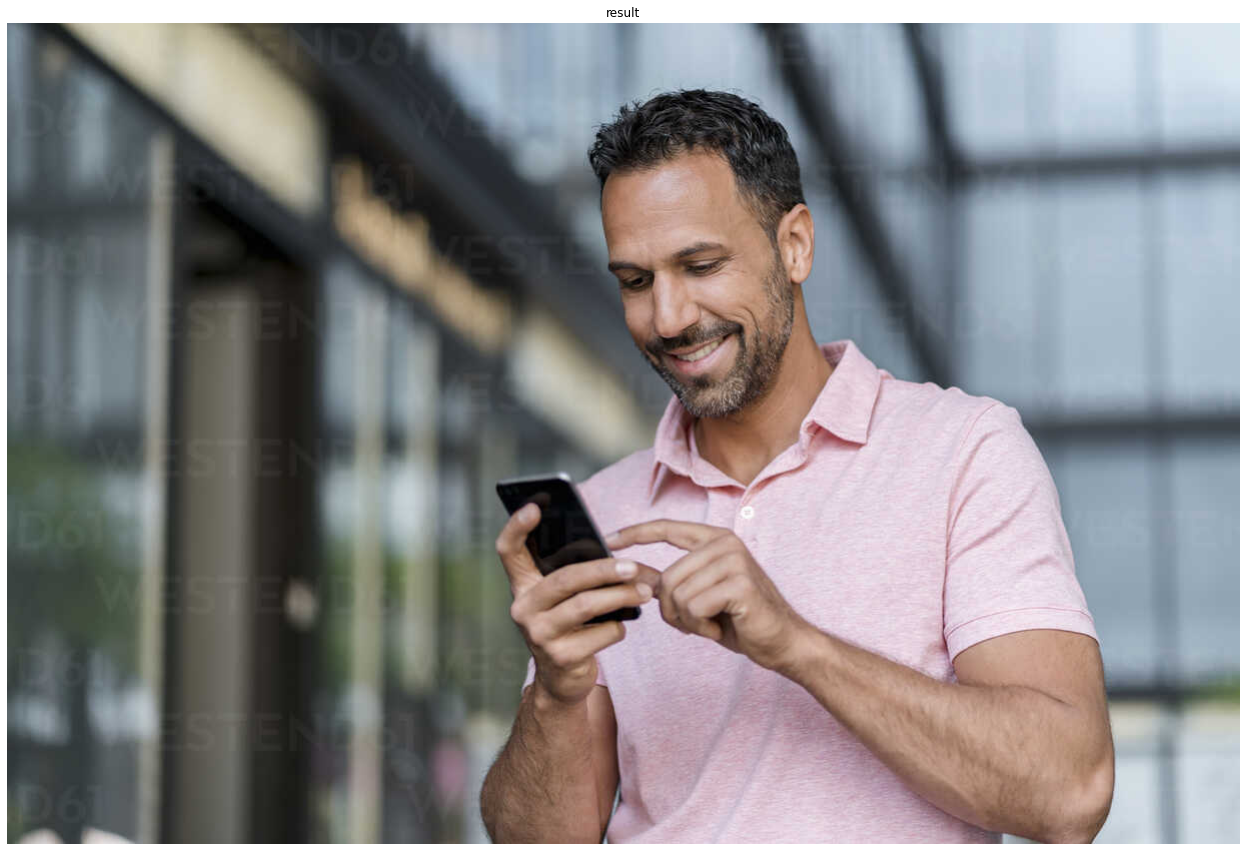

In [48]:
# Inference
from mmdet.apis import inference_detector, show_result_pyplot

img = mmcv.imread('/home/aiteam/tykim/scratch/lightweight/mmcv_phone/hold_smartphone/imgs/a193.jpg')
model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)